In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#load dataset
df = pd.read_csv('Queens_Midtown_Tunnel.csv')
df.head()

,Date,Total,Day
0,2010010100,416,Friday
1,2010010101,532,Friday
2,2010010102,529,Friday
3,2010010103,381,Friday
4,2010010104,315,Friday


In [4]:
#look at the distribution of the Total cars
df["Total"].describe()

count    61536.000000
mean      1767.652626
std       1064.844880
min          0.000000
25%        883.000000
50%       1896.000000
75%       2550.000000
max       4497.000000
Name: Total, dtype: float64

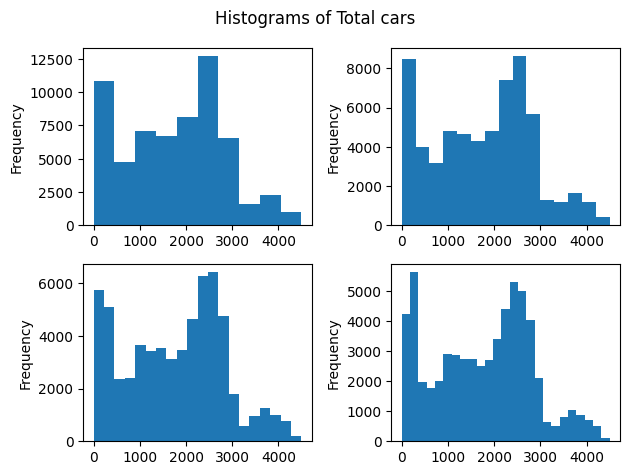

In [5]:
#bucket the data into 10, 15, 20, 25 bins and plot histograms
fig, axs = plt.subplots(2, 2)
fig.suptitle('Histograms of Total cars')
df["Total"].plot.hist(bins=10, ax=axs[0,0])
df["Total"].plot.hist(bins=15, ax=axs[0,1])
df["Total"].plot.hist(bins=20, ax=axs[1,0])
df["Total"].plot.hist(bins=25, ax=axs[1,1])
plt.tight_layout()
plt.show()

In [6]:
#adding buckets corresponding to each bin size
df["Bucket-10"] = pd.cut(df["Total"], bins=10, labels=False)
df.head()

,Date,Total,Day,Bucket-10
0,2010010100,416,Friday,0
1,2010010101,532,Friday,1
2,2010010102,529,Friday,1
3,2010010103,381,Friday,0
4,2010010104,315,Friday,0


In [7]:
#convert the date to the row number instead
#set the date column to be the index
df["Date"] = df.reset_index().index
df.rename(columns={'Date': 'Time'}, inplace=True)
df.head()


,Time,Total,Day,Bucket-10
0,0,416,Friday,0
1,1,532,Friday,1
2,2,529,Friday,1
3,3,381,Friday,0
4,4,315,Friday,0


In [8]:
#convert dataset into CTMC-friendly format

new_df = []

currentBucket = 0
startTime = 0
currSum = 0
for index, row in df.iterrows():
    if row["Bucket-10"] == currentBucket:
        currSum += row["Total"]
    else:
        new_df.append([currentBucket, startTime, row["Time"], currSum])
        currentBucket = row["Bucket-10"]
        startTime = row["Time"]
        currSum = row["Total"]
    
new_df.append([currentBucket, startTime, row["Time"], currSum])
new_df = pd.DataFrame(new_df, columns=["State", "Start_Time", "End_Time", "Total_Cars"])
new_df.head()

,State,Start_Time,End_Time,Total_Cars
0,0,0,1,416
1,1,1,3,1061
2,0,3,7,1364
3,1,7,11,2396
4,2,11,13,2312


In [9]:
new_df.to_csv('CTMC_QMT.csv', index=False)

In [10]:
#range of cars in each bucket


[[0.0, 237.0],
 [237.0, 583.0],
 [583.0, 1074.0],
 [1074.0, 1471.0],
 [1471.0, 1896.0],
 [1896.0, 2224.0],
 [2224.0, 2451.0],
 [2451.0, 2660.0],
 [2660.0, 2957.0],
 [2957.0, 4497.0],
 [4497.0, inf]]